# OLS Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**Given dataset**

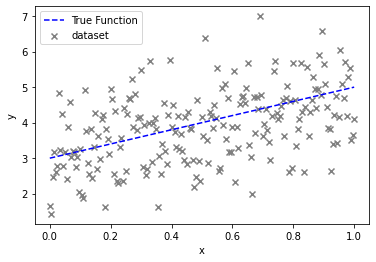

In [123]:
m = 201
x = np.linspace(0, 1, m)
y = 2*x + 3
y_noise = y + np.random.normal(size=m)

# Plot
plt.scatter(x, y_noise, marker='x', c='grey', label='dataset')
plt.plot(x, y, '--b', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

- we choose a sample, then we create a linear regression based from that sample
- in consequence, we got different number of model parameter from each sample

In [133]:
def slope_regression(x, y_noise, y, n_sample, n_exp):
    theta_hist = []
    print(f"------------------ Sample : {n_sample}---------------")
    for i in range(n_exp):
        # Choose sample
        idx_choosen = np.random.choice(range(m), n_sample, replace=False)
        x_choosen = x[idx_choosen]
        y_noise_choosen = y_noise[idx_choosen]

        # Create OLS solution
        X_choosen = np.column_stack((np.ones(n_sample), x_choosen))
        pinv_choosen = np.linalg.inv(X_choosen.T @ X_choosen)
        theta_choosen = pinv_choosen @ X_choosen.T @ y_noise_choosen

        theta_hist.append(theta_choosen)

        # Plot
        if i<=0:
            y_pred_choosen = np.column_stack((np.ones(m), x)) @ theta_choosen
            plt.scatter(x, y_noise, marker='.', c='grey', label='population dataset')
            plt.scatter(x_choosen, y_noise_choosen, marker='x', c='red', label='sample dataset')
            plt.plot(x, y_pred_choosen, '-.r', label='Sample Function')
            plt.plot(x, y, '--b', label='True Function')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.legend()
            plt.show()
            
    # slope analysis
    # Get theta 1
    theta_1_hat = np.array([theta[1] for theta in theta_hist])
    mean_theta_1_hat = theta_1_hat.mean()
    SE_theta_1_hat = np.linalg.norm(theta_1_hat - theta_1_hat.mean()) / (n_exp**0.5)

    # Find t-statistics
    t = theta_1_hat / SE_theta_1_hat
    mean_t = t.mean()
    SE_t = np.linalg.norm(t - t.mean()) / (n_exp**0.5)

    # Plot
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
    ax[0].hist(theta_1_hat, density=True)
    ax[0].set_xlabel('theta_1')
    ax[0].set_title('theta_1 distribution')
    ax[0].axvline(x=mean_theta_1_hat - 2*SE_theta_1_hat,
                  color='r', ls='--')
    ax[0].axvline(x=mean_theta_1_hat + 2*SE_theta_1_hat,
                  color='r', ls='--')
    
    ax[1].hist(t, density=True)
    ax[1].set_xlabel('t_statistics')
    ax[1].set_title('t_statistics distribution')
    ax[1].axvline(x=mean_t - 2*SE_t,
                  color='r', ls='--')
    ax[1].axvline(x=mean_t + 2*SE_t,
                  color='r', ls='--')
    fig.suptitle(f'n_sample={n_sample}, SE_theta_1 = {SE_theta_1_hat:.2f}')
    plt.show()

------------------ Sample : 2---------------


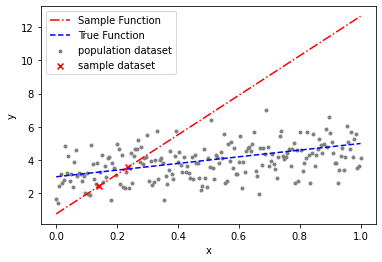

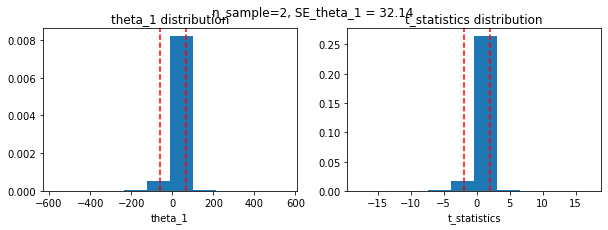

------------------ Sample : 22---------------


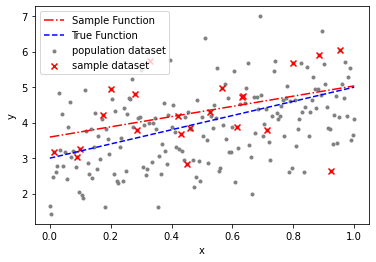

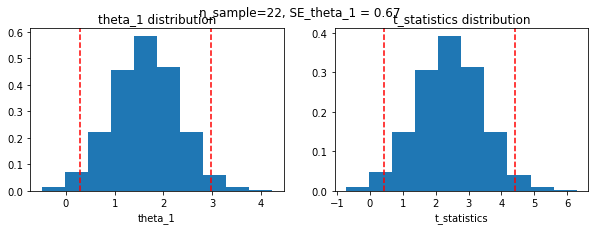

------------------ Sample : 42---------------


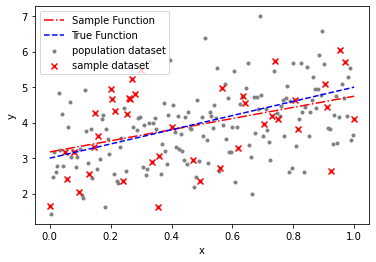

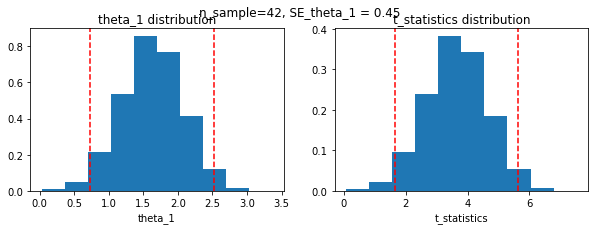

------------------ Sample : 62---------------


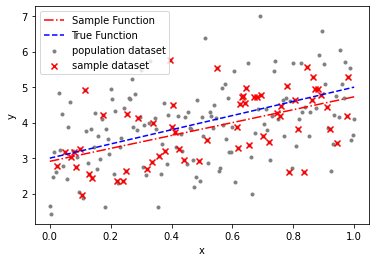

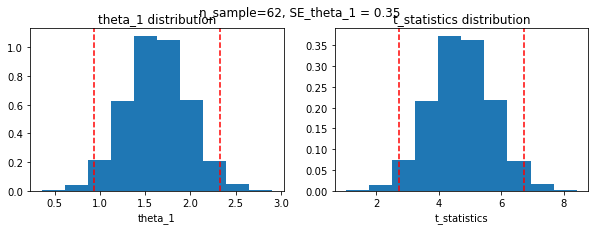

------------------ Sample : 82---------------


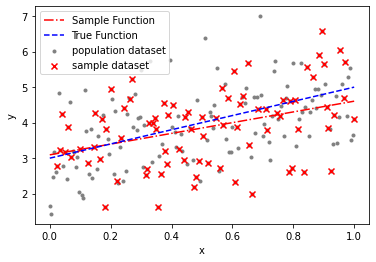

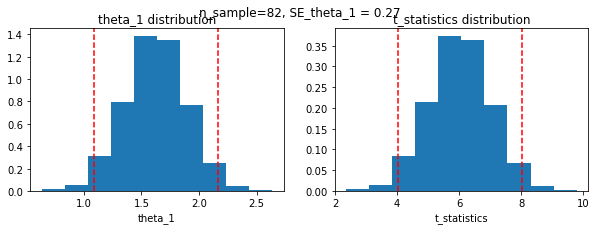

------------------ Sample : 102---------------


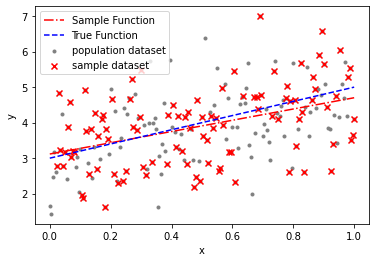

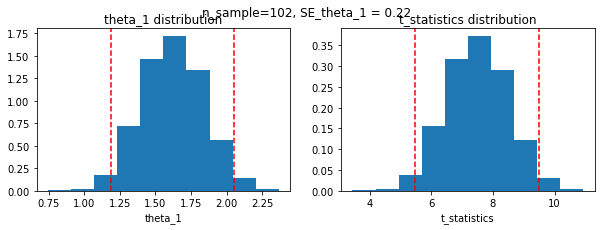

------------------ Sample : 122---------------


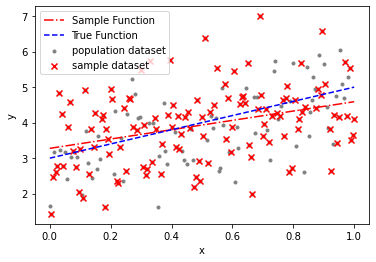

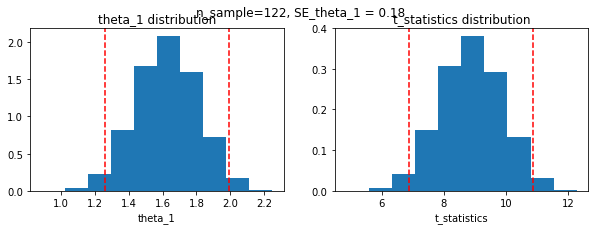

------------------ Sample : 142---------------


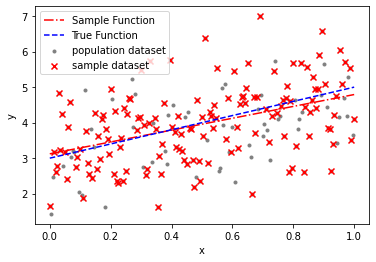

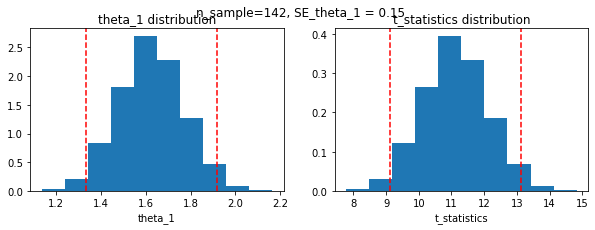

------------------ Sample : 162---------------


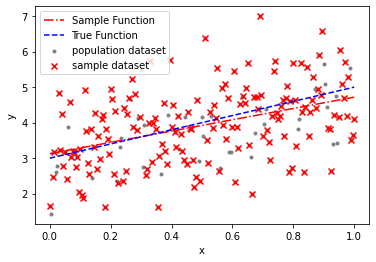

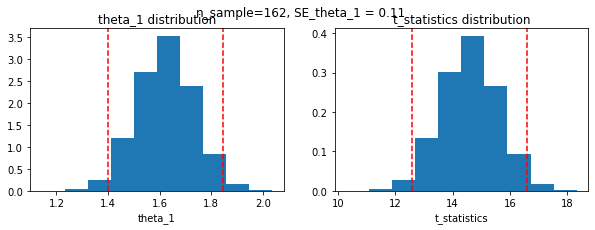

------------------ Sample : 182---------------


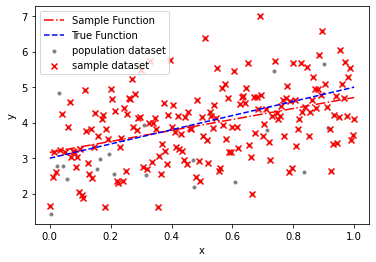

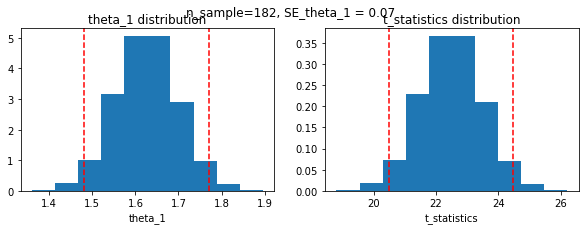

In [134]:
n_test = 10
for i in range(n_test):
    n_sample = i*20 + 2
    n_exp = 5000
    slope_regression(x, y_noise, y, n_sample, n_exp)

- at small set of samples, $\theta_1$ tends to 0
- at larger set, we can see that $\theta_1$ is moving away from zero.
- the more larger set, we can see that $\theta_{1}$ standard error becomes smaller